In [2]:
import numpy as np
import pandas as pd
import matplotlib 
#matplotlib.style.use('ggplot')
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# import dataframe
analysis = pd.read_pickle('analysis.p')
# dataframe with non-nan alpha values
analysis = analysis.query("alpha!=''")
# pull out all alpha values (not nans)
alphaV = analysis['alpha'].values
# pull out just alphas with corresponding p>0.1
analysis_alphap = analysis.query('ppl> 0.1')
alphapV = analysis_alphap['alpha'].values
# pull out alphas with p>0.1 and ntail>50
alphapnV = analysis.query('ppl>0.1 and ntail > 50')['alpha'].values

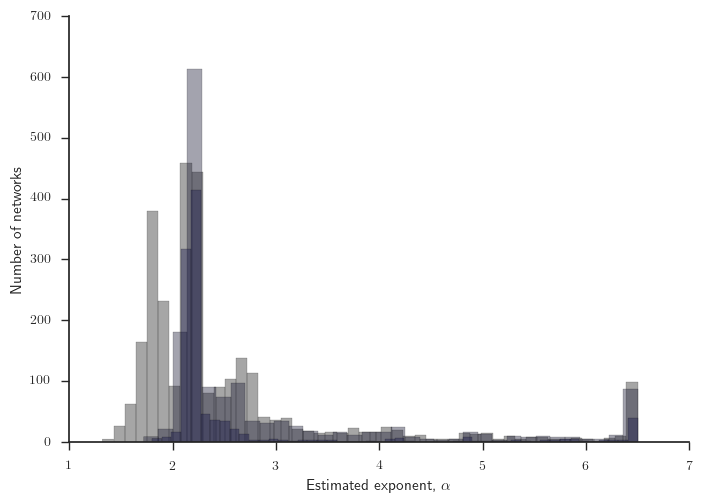

In [4]:
sns.set_context("talk")
sns.set(rc={'text.usetex' : True})
# sns.set_palette(sns.dark_palette('navy', input = 'xkcd', reverse=True))
sns.set_palette(sns.dark_palette("navy"))
sns.set_style('ticks')
fix,ax = plt.subplots()
pairs = [(alphaV, 'blue'), (alphapV, 'g'), (alphapnV, 'y')]
#for a, c in pairs:
for a in [alphaV, alphapV, alphapnV]:
    sns.distplot(a, hist=True, kde=False, ax=ax )
ax.set(xlabel=r'Estimated exponent, $\alpha$', ylabel = 'Number of networks')
sns.despine()
plt.show()

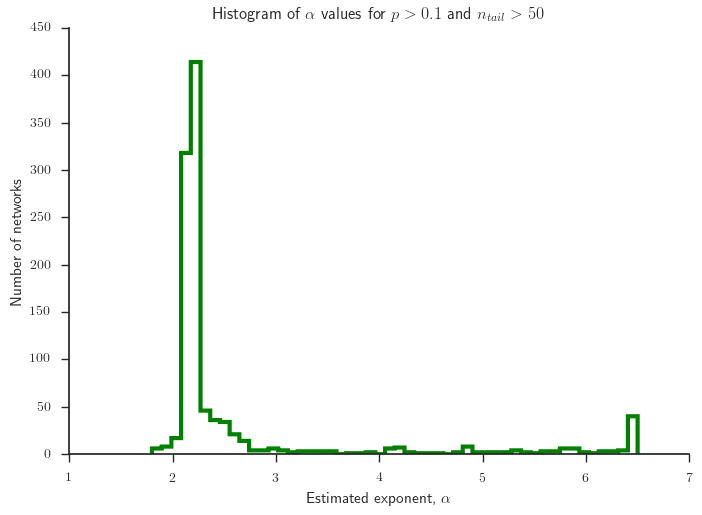

In [5]:
sns.set_context("talk")
sns.set(rc={'text.usetex' : True})
# sns.set_palette(sns.dark_palette('navy', input = 'xkcd', reverse=True))
sns.set_palette(sns.dark_palette("navy"))
sns.set_style('ticks')
fix,ax = plt.subplots()
sns.distplot(alphapnV, hist=True, kde=False, ax=ax,hist_kws={"histtype": "step", "linewidth": 3,"alpha": 1, "color": "g"})
ax.set(xlabel=r'Estimated exponent, $\alpha$', ylabel = 'Number of networks', title=r'Histogram of $\alpha$ values for $p>0.1$ and $n_{tail}>50')
sns.despine()
plt.show()

In [6]:
meanalpha = np.mean(alphaV)
meanalphap = np.mean(alphapV)
meanalphapn = np.mean(alphapnV)
ntail = len(analysis.query('ntail>50'))
prejtail = len(analysis.query('ppl<0.1 and ntail>50'))/float(ntail)*100
percent_rejected = (1-(len(alphapV))/float(len(alphaV)))*100
print 'Mean alpha = %s' %meanalpha
print 'Mean alpha for p>0.1 = %s' %meanalphap
print r'Mean alpha for p>0.1 with ntail > 50 = %s' %meanalphapn
print 'Percent of networks that are rejected as power law = %0.2f%%' %percent_rejected
print r'Percent of networks with ntail> 50 that are rejected as power law = %0.2f%%' %prejtail
print 'Total number of networks = %s' %len(alphaV)
print 'Number of networks with p>0.1 = %s' %len(alphapV)
print 'Number of networks with p>0.1 and ntail>50 = %s' %len(alphapnV)

Mean alpha = 2.57345503719
Mean alpha for p>0.1 = 2.91709656513
Mean alpha for p>0.1 with ntail > 50 = 2.62340225564
Percent of networks that are rejected as power law = 47.84%
Percent of networks with ntail> 50 that are rejected as power law = 55.04%
Total number of networks = 2958
Number of networks with p>0.1 = 1543
Number of networks with p>0.1 and ntail>50 = 1064


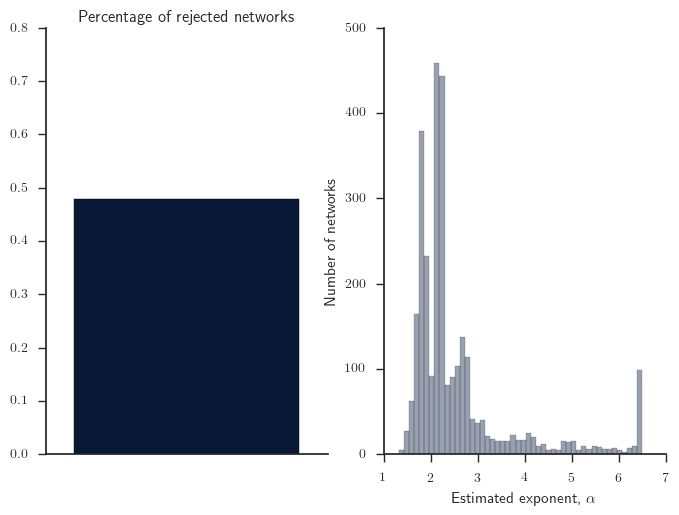

In [7]:
## Plot
fig = plt.figure()
sns.set_context("talk")
sns.set(rc={'text.usetex' : True})
sns.set_palette(sns.dark_palette('navy', input = 'xkcd', reverse=True))
sns.set_style('ticks')
ax1 = fig.add_subplot(1,2,1)
x = [1]
y = [percent_rejected/100]
sns.barplot(x=x, y=y)
ax1.set_xticks([])
y = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]
ax1.set_yticks(y)
ax1.set(title='Percentage of rejected networks')
ax2 = fig.add_subplot(1,2,2)
sns.distplot(alphaV, kde=False)
ax2.set(xlabel=r'Estimated exponent, $\alpha$', ylabel = 'Number of networks')
sns.despine()
plt.show()

In [8]:
# data for histogram of data categories
df = analysis # could make this a subset, ie just largest components
cat = pd.Series()
# multiplex
# NOTE: ADD MULTIgraph BACK IN LATER!!!
#cat.loc['totalmp'] = len(df.query('Multiplex != 0'))
cat.loc['Multiplex'] = len(df.query('Multiplex != 0 & Bipartite == 0 & Multigraph ==0 & Weighted==0 & Directed == 0'))
cat.loc['Multiplex Bipartite Multigraph'] = len(df.query('Multiplex != 0 & Bipartite != 0 & Weighted==0 & Directed == 0'))
cat.loc['Multiplex Multigraph'] = len(df.query('Multiplex != 0 & Bipartite == 0 & Weighted==0 & Directed == 0'))
cat.loc['Multiplex Weighted Directed Multigraph'] = len(df.query('Multiplex != 0 & Bipartite == 0 & Weighted!=0 & Directed != 0'))
cat.loc['Multiplex Directed Multigraph'] = len(df.query('Multiplex != 0 & Bipartite == 0 & Weighted==0 & Directed != 0'))
cat.loc['Multiplex Directed'] = len(df.query('Multiplex != 0 & Bipartite == 0 & Weighted==0 & Directed != 0'))

# bipartite
#cat.loc['totalbip'] = len(df.query('Multiplex==0 &Bipartite != 0'))
cat.loc['Bipartite'] = len(df.query('Multiplex==0 &Bipartite != 0 & Weighted==0 & Directed==0'))
cat.loc['Bipartite Weighted'] = len(df.query('Multiplex==0 & Bipartite != 0 & Weighted!=0 & Directed==0'))

# multigraph

##### COME BACK TO THIS!! ########

# weighted
#cat.loc['totalweigh'] = len(df.query('Multiplex==0 &Bipartite == 0 & Weighted!=0'))
cat.loc['Weighted'] = len(df.query('Multiplex==0 &Bipartite == 0 & Weighted!=0 & Directed==0'))
cat.loc['Weighted Directed'] = len(df.query('Multiplex==0 &Bipartite == 0 & Weighted!=0 & Directed!=0'))


# directed
cat.loc['Directed'] = len(df.query('Multiplex==0 &Bipartite == 0 & Weighted==0 & Directed!=0'))

#simple
cat.loc['Simple'] = len(df.query('Multiplex==0 &Bipartite == 0 & Weighted==0 & Directed==0'))

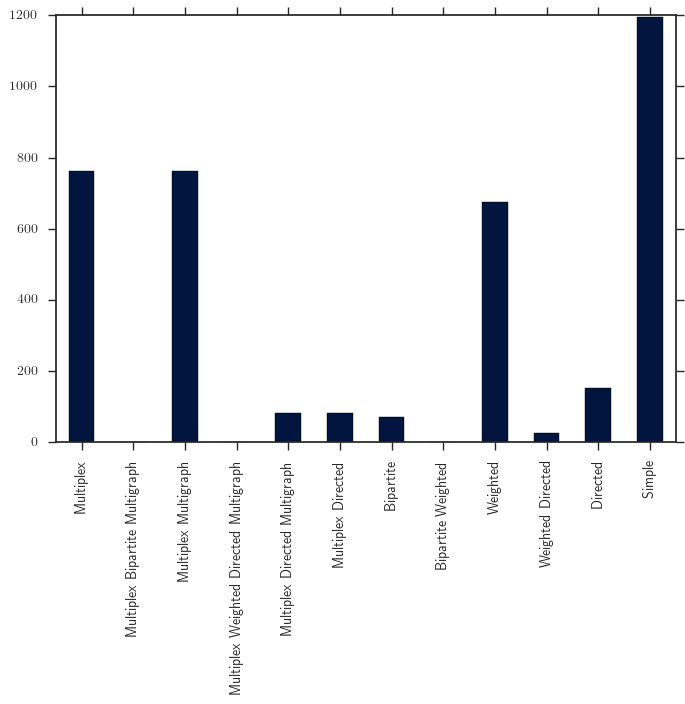

In [9]:
np.shape(cat.values)
np.shape(cat.axes[0])
plt.figure()
cat.plot.bar()
plt.show()

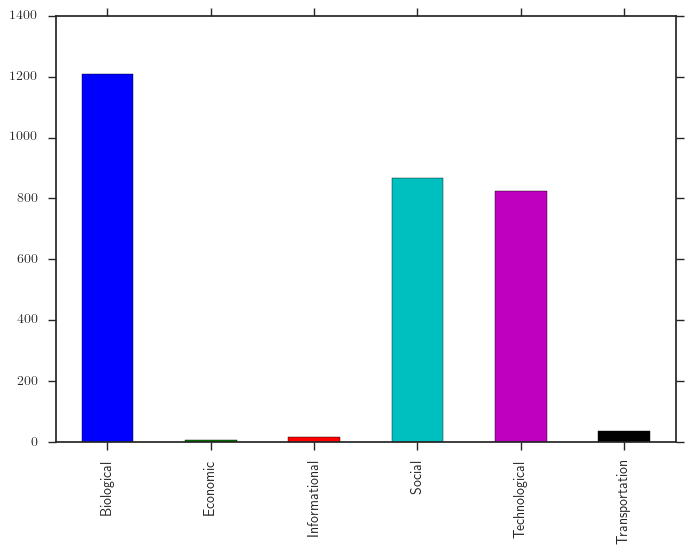

In [18]:
# data for histogram of domains 
df = analysis # could make this a subset, ie just largest components
domlist = np.unique(df['Domain'])
doms = pd.Series(data=np.zeros(len(domlist), dtype=int),index=domlist)
for dom in domlist:
    checkstr = 'Domain=="%s"' %dom
    doms.loc[dom] = len(df.query(checkstr))
colordict = {'Biological':'b', 'Economic':'g', 'Informational':'r', 'Social':'c', 'Technological':'m', 'Transportation':'k'}
#doms.plot.bar()
doms.plot(kind='bar', color=[colordict[dom] for dom in doms.index])
plt.show()

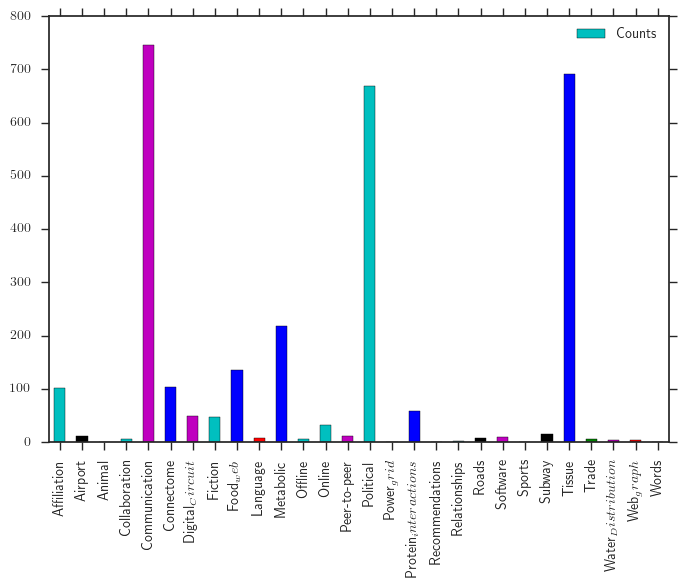

In [11]:
# data for histogram of domains 
df = analysis # could make this a subset, ie just largest components
sublist = np.unique(df['Subdomain'])
subs = pd.DataFrame(index=sublist, columns=['Counts', 'Domain', 'Color'])
#subs['Counts'] =np.zeros(len(sublist),dtype=int)
colordict = {'Biological':'b', 'Economic':'g', 'Informational':'r', 'Social':'c', 'Technological':'m', 'Transportation':'k'}
for sub in sublist:
    checkstr = 'Subdomain=="%s"' %sub
    subs.loc[sub]['Counts'] = len(df.query(checkstr))
    dom = df.query(checkstr)['Domain'][0]
    subs.loc[sub]['Domain'] = dom
    subs.loc[sub]['Color'] = colordict[dom]
subs['Counts'].plot(kind='bar', legend=True, color=[colordict[dom] for dom in subs['Domain']])
plt.show()

In [16]:
'Biological' in doms.index

True